In [0]:
import pandas as pd
import numpy as np
import sklearn
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas.util.testing as tm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


## Load Data

In [0]:
df=pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
columns=df.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [0]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
X=df.drop(['Class'],axis=1)
y=df['Class']
X= df.dropna()
y= y.dropna()
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Defining Train and Test Data

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Supervised Machine Learning Phase -  Baseline Method 1: Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      1.00      1.00        96

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



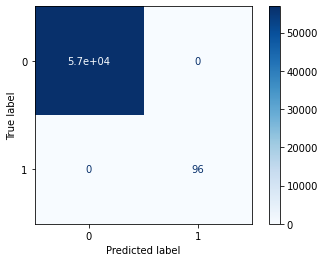

In [0]:
clf_dt=DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=4)
clf_dt.fit(X_train,y_train)
y_predict=clf_dt.predict(X_test)
plot_confusion_matrix(clf_dt,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [0]:
cl_dt=DecisionTreeClassifier()
cl_dt.fit(X_train,y_train)
y_predict=cl_dt.predict(X_test)
print(y_predict)


[0 0 0 ... 0 0 0]


In [0]:
score1=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1))

score2 = cross_val_score(clf_dt, X_train, y_train, cv=10)
print(score2)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))

score3 = cross_val_score(clf_dt, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3.mean(),score3.std()))

Accuracy (without cross-validation) : 1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy (after cross-validation): 1.0 (+/- 0.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cohen Kappa Score (after cross-validation): 1.0 (+/- 0.0)


In [0]:
#cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

## Baseline 2: Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1589
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



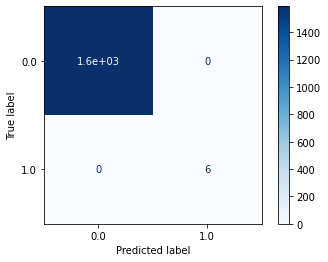

In [0]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [0]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))


Accuracy (without cross-validation) : 1.0
[1.         1.         1.         1.         1.         0.9984326
 1.         0.99843014 1.         1.        ]
Accuracy (after cross-validation): 0.9996862743168162 (+/- 0.0006274516076022347)
[1.         1.         1.         1.         1.         0.66596859
 1.         0.         1.         1.        ]
Cohen Kappa Score (after cross-validation): 0.8665968586387434 (+/- 0.3055508147640086)


In [0]:
#cohen_kappa_score(y_test, y_predict, labels=None, weights=None)

In [0]:
model_accuracies={} #A dictionary to save the accuracies for the different permutations of the bins
model_kappa_scores={} #A dictionary to save the cohen kappa scores for the different permutations of the bins

In [0]:
#Original Imbalance

Class_count=df3['Class'].value_counts()
print(Class_count)

imbalance_Class=(Class_count[0]/(Class_count[0]+Class_count[1]))*100
print(imbalance_Class)


0.0    7947
1.0      25
Name: Class, dtype: int64
99.68640240842952


-- 10-fold cross-validation 
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


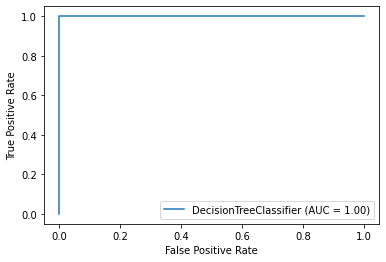

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(min_samples_split=20,
                                random_state=99)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)


#Result
print(scores['test_score'].mean())

plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.999375


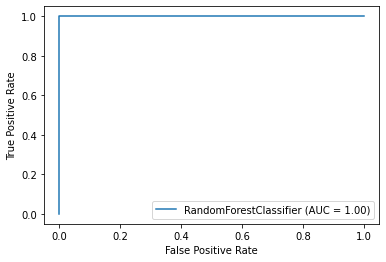

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

#Defining Random Forest Classifier
rf_clf = RandomForestClassifier()

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

#Result
print(scores['test_score'].mean())

plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc


cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier()

rf_clf =RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)
rf_score=[]
dt_score=[]
for train,test in skf.split(X, y):
  rf_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  dt_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  yrf_pred=rf_clf.predict(X.iloc[test])
  ydt_pred=dt_clf.predict(X.iloc[test])
  y_true=y.iloc[test]
  dt_score.append(acc(y_true.values.ravel(),ydt_pred))
  rf_score.append(acc(y_true.values.ravel(),yrf_pred))
  print("Score for stratified Decision Tree is")
  print(dt_score) 
  print( 'Stratified Random Forest Tree')
  print(rf_score)


Score for stratified Decision Tree is
[1.0]
Stratified Random Forest Tree
[0.9974937343358395]
Score for stratified Decision Tree is
[1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[0.9974937343358395, 0.9987468671679198, 1.0, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree 

## Analyzing the number of clusters using Elbow method and Silhouette method

silhouette %dth score:%d  2 0.6632374366755808
silhouette %dth score:%d  3 0.5903738950309363
silhouette %dth score:%d  4 0.5905657856905627
silhouette %dth score:%d  5 0.5690138536877847
silhouette %dth score:%d  6 0.5613582616088817
silhouette %dth score:%d  7 0.5484449080441142
silhouette %dth score:%d  8 0.5446693122279123
silhouette %dth score:%d  9 0.5405450535784481
silhouette %dth score:%d  10 0.539039182284146
silhouette %dth score:%d  11 0.5355910277319426
silhouette %dth score:%d  12 0.5391837248642538
silhouette %dth score:%d  13 0.526637938295092
silhouette %dth score:%d  14 0.5229057676503195
distortion is  [1357.70736218837, 901.0213902927053, 671.3325045458666, 559.5151548991397, 461.76145107523666, 406.4020612615854, 347.4144040271087, 309.63206373220225, 280.2945787098456, 259.6638058811401, 239.22608475568106, 220.84958708139823, 221.43888518966548]


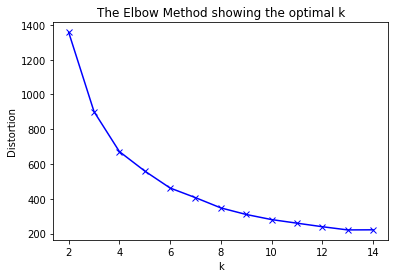

In [0]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    labels = kmeanModel.labels_
    print("silhouette %dth score:%d ",k, metrics.silhouette_score(X, labels, metric='euclidean'))
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

print("distortion is ", distortions)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
print("Decision Tree model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))
print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

Decision Tree model:
Accuracy (after cross-validation): 1.0 (+/- 0.0)
Random Forest model:
Accuracy (after cross-validation): 0.9996862743168162 (+/- 0.0006274516076022347)


## Permutation Tests

In [0]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [0]:
acc_old_1 = np.array([0.96428571, 0.96218487, 0.96428571, 0.96638655, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.95798319, 0.96428571])
kappa_old_1=np.array([0.,0.09025271, 0., 0.10756972, 0., 0.,0.09848485, 0.10168739, -0.00762066,  0.10168739])
acc_old_2=np.array([0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96218487, 0.96218487, 0.96218487])
kappa_old_2=np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

acc_new=np.array([0.96464646, 0.96464646, 0.96464646, 0.96464646, 0.96464646,0.96464646, 0.96464646, 0.96464646, 0.96464646, 0.96464646])
kappa_new=np.array([0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549])

#Accuracy: DT and new
mean_old=acc_old_1.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_1,acc_new,t_obs)
print("Accuracy comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Accuracy: RF and new
mean_old=acc_old_2.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_2,acc_new,t_obs)
print("Accuracy comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

#Kappa: DT and new
mean_old=kappa_old_1.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_1,kappa_new,t_obs)
print("Kappa comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Kappa: RF and new
mean_old=kappa_old_2.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_2,acc_new,t_obs)
print("Kappa comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

Accuracy comparison between Decision Tree and new method:
p-value: 0.10342
Accuracy comparison between Random Forest and new method:
p-value: 0.0
Kappa comparison between Decision Tree and new method:
p-value: 0.01576
Kappa comparison between Random Forest and new method:
p-value: 0.32714


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6632374366755808


ValueError: ignored

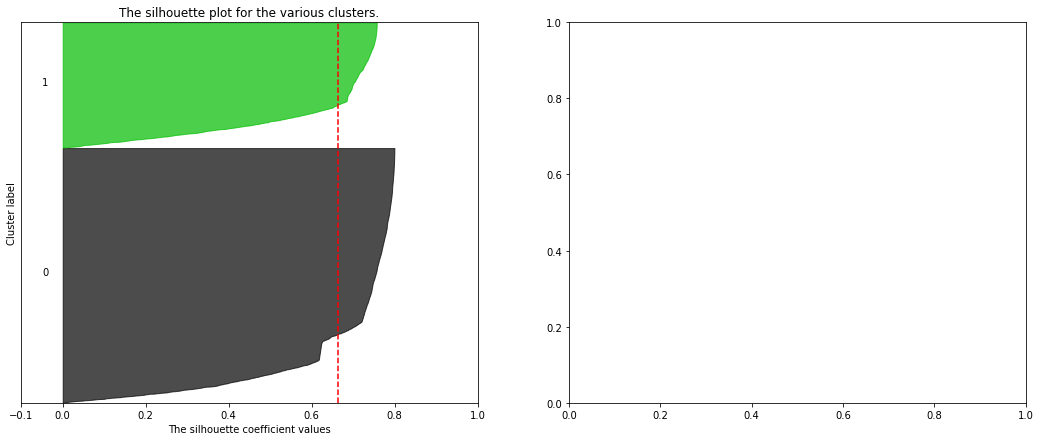

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3.iloc[:, 0], df3.iloc[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()